<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    p = len(X)
    n = X[0].shape[1]
    sum_matrix = np.zeros((n, ), dtype=int)
    for i in range(0, p):
        sum_matrix += np.matmul(X[i], V[i])
    return sum_matrix

def test_task_1(X, V, sum_matrix):
    return np.array_equal(sum_prod(X, V), sum_matrix)

def test_size_2():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([1, 2]), np.array([3, 4])]
    sum_matrix = np.array([44, 64])
    return test_task_1(X, V, sum_matrix)

def test_size_3():
    X = [np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]]), np.array([[5, 6, 1], [7, 8, 2], [1, 4, 3]])]
    V = [np.array([1, 2, 3]), np.array([3, 4, 6])]
    sum_matrix = np.array([59, 91, 75])
    return test_task_1(X, V, sum_matrix)

print(test_size_2())
print(test_size_3())

True
True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    return np.where(M <= threshold, 0, 1)

def test_task_2(M, binarized_matrix):
    return np.array_equal(binarize(M),binarized_matrix)

def test_binarized():
    return test_task_2(np.arange(9).reshape(3, 3) * 0.1, np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]]))

test_binarized()

True

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    return get_unique_elements(mat)

def unique_columns(mat):
    return get_unique_elements(mat.T)

def get_unique_elements(mat):
    unique_elements = {}
    for axis in mat:
        unique_elements[str(axis)] = np.unique(axis)
    return unique_elements

def test_task_3(mat, result, unique):
    for key, value in result.items():
        if not np.array_equal(value, unique[key]):
            return False
    return True

def test_unique_rows():
    mat = np.array([[1, 2, 2], [3, 3, 3], [4, 5, 6]])
    return test_task_3(mat, unique_rows(mat), {'[1 2 2]' : [1, 2], '[3 3 3]' : [3], '[4 5 6]' : [4, 5, 6]})

def test_unique_columns():
    mat = np.array([[1, 2, 2], [3, 2, 3], [3, 2, 6]])
    return test_task_3(mat, unique_columns(mat), {'[1 3 3]' : [1, 3], '[2 2 2]' : [2], '[2 3 6]' : [2, 3, 6]})

print(test_unique_rows())
print(test_unique_columns())

True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

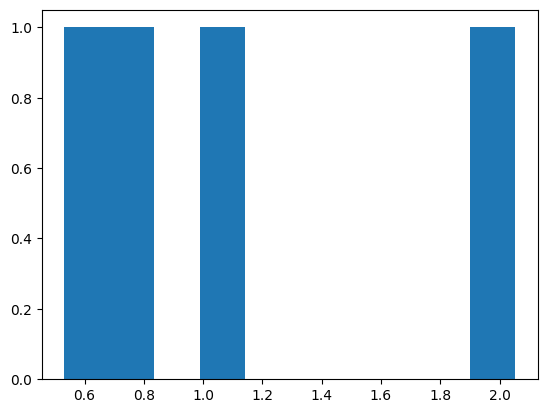

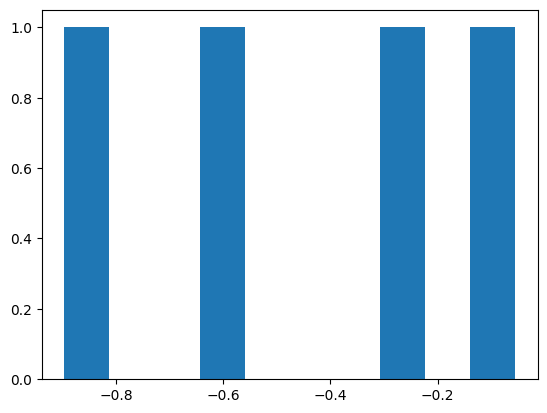

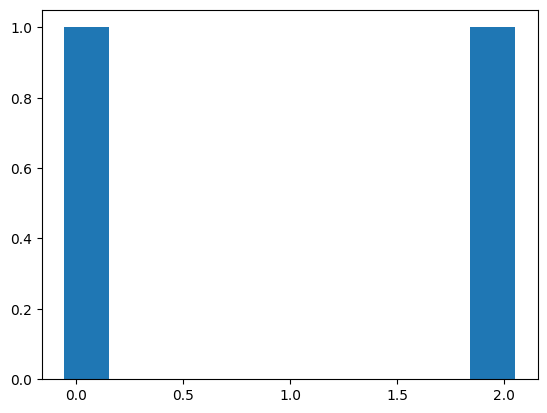

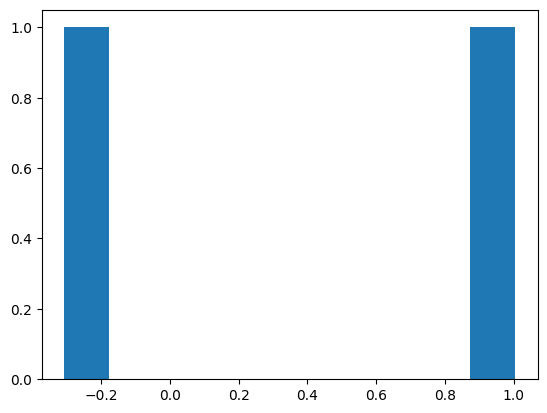

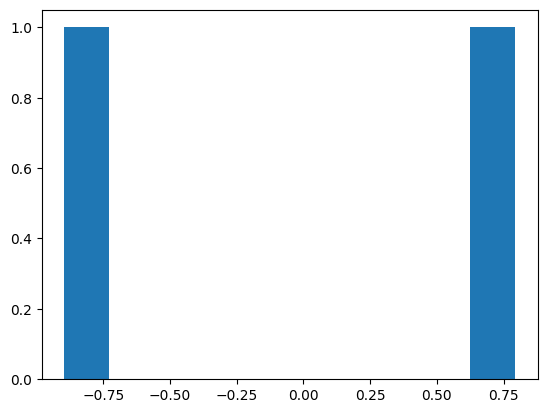

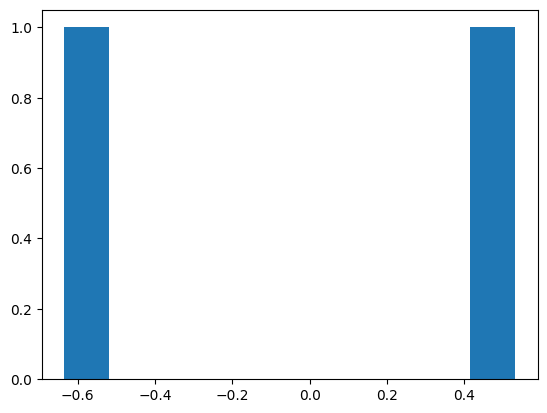

In [6]:
def show_matrix_random_normal_info(m, n):
    random = np.random.default_rng()
    matrix = random.normal(size=(m, n))
    show_axis_info(m, matrix)
    show_axis_info(n, matrix.T)

def show_axis_info(axis_count, matrix):
    for axis in range(axis_count):
        mean = np.mean(matrix[axis])
        std = np.std(matrix[axis])
        plt.hist(matrix[axis])
        plt.show()

show_matrix_random_normal_info(2, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a, b):
    matrix = np.eye(m, n)
    for row in range(m):
        for column in range(n):
            if (row + column) % 2 == 0:
                matrix[row][column] = a
            else:
                matrix[row][column] = b
    return matrix

def test_task_5(m, n, a, b, required_matrix):
    return np.array_equal(chess(m, n, a, b), required_matrix)

def test_1_1():
    return test_task_5(1, 1, 0, 2, [[0]])

def test_1_2():
    return test_task_5(1, 2, 0, 2, [[0, 2]])

def test_5_4():
    return test_task_5(5, 4, 0, 2, [[0, 2, 0, 2], [2, 0, 2, 0], [0, 2, 0, 2], [2, 0, 2, 0], [0, 2, 0, 2]])

print(test_1_1())
print(test_1_2())
print(test_5_4())

True
True
True


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

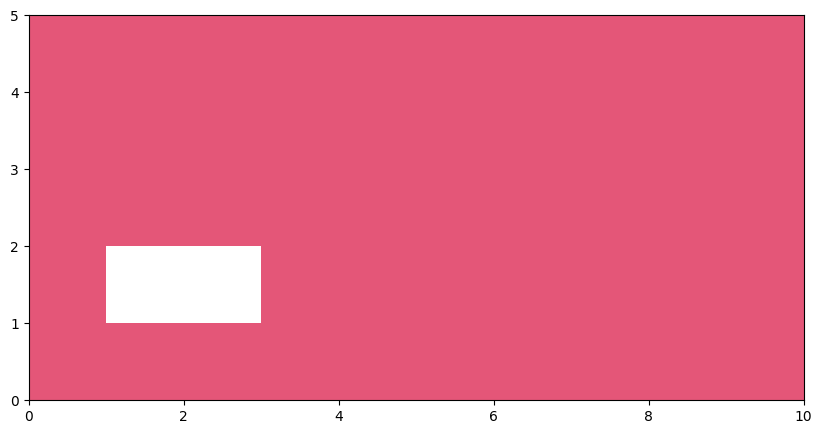

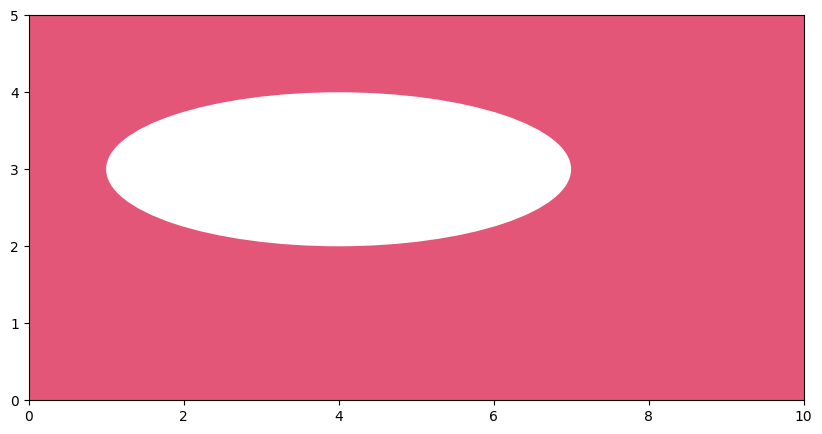

In [15]:
from matplotlib.patches import Rectangle, Ellipse

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    ax = set_plot_area(m, n, background_color)
    lowest_x = 1
    lowest_y = 1
    if (lowest_x + a > m or lowest_x < 0 or lowest_y + b > n or lowest_y < 0):
        raise Exception("Out of image bounds!")
    ax.add_patch(Rectangle((1, 1), a, b, facecolor=rectangle_color, fill=True))

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    ax = set_plot_area(m, n, background_color)
    center_x = 4
    center_y = 3
    if (center_x + a > m or center_x - a < 0 or center_y + b > n or center_y - b < 0):
        raise Exception("Out of image bounds!")
    ax.add_patch(Ellipse((4, 3), 2*a, 2*b, facecolor=ellipse_color, fill=True))
    
def set_plot_area(m, n, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])

    fig.set_figwidth(m)
    fig.set_figheight(n)
    
    ax.set_facecolor(background_color)
    return ax

draw_rectangle(2, 1, 10, 5, '#ffffff', '#e45678')
draw_ellipse(3, 1, 10, 5, '#ffffff', '#e45678')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [9]:
from math import sqrt

def get_time_series_info(array, p):
    expectation = np.mean(array)
    dispersion = np.std(array)
    mse = sqrt(dispersion)
    (local_mins, local_maxs) = get_local_extremums(array)
    moving_avarage_series = get_moving_average_series(array, p)
    print(expectation)
    print(dispersion)
    print(mse)
    print(local_mins)
    print(local_maxs)
    print(moving_avarage_series)
    
def get_local_extremums(array):
    local_maxs =[]
    local_mins = []
    for i in range(1, len(array) - 1):
        if array[i] > array[i - 1] and array[i] > array[i + 1]:
            local_maxs.append(array[i])
        if array[i] < array[i - 1] and array[i] < array[i + 1]:
            local_mins.append(array[i])
    return (local_mins, local_maxs)

def get_moving_average_series(array, p):
    moving_average_array = []
    window_sum = sum(array[0:p])
    moving_average_array.append(window_sum / p)
    for i in range(p, len(array)):
        window_sum += array[i]
        window_sum -= array[i - p]
        moving_average_array.append(window_sum / p)
    return moving_average_array

get_time_series_info(np.array([1,2,3,4,5,4,3,2,1,2,3,2,1,2,3,4,5,6,5,4,3,2,1]), 10)

2.9565217391304346
1.4288414543613028
1.195341563889294
[1, 1]
[5, 3, 6]
[2.7, 2.9, 2.9, 2.7, 2.5, 2.3, 2.3, 2.5, 2.9, 3.3, 3.5, 3.5, 3.5, 3.5]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [30]:
def one_hot_encode(vector):
    max_label = max(vector)
    result_encoding = []
    for label in vector:
        label_encoding = [0] * (max_label + 1)
        label_encoding[label] = 1
        result_encoding.append(label_encoding)
    return result_encoding
        
def test_task_8():
    labels = [1, 3, 3, 2, 2, 1]
    encoding = [[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0]]
    # labels = [0, 2, 3, 0]
    # encoding = [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
    return encoding == one_hot_encode(labels)

test_task_8()

True